In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
plt.style.use('fivethirtyeight')

In [2]:

from binance.client import Client
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

plt.style.use('fivethirtyeight')

# Binance API credentials (replace with your own or use environment variables)

client = Client()

# Define the timeframe
end = datetime.now()
start = datetime(end.year-15, end.month, end.day)

# Fetch historical data from Binance
klines = client.get_historical_klines("BTCUSDT", Client.KLINE_INTERVAL_1DAY, start.strftime("%Y-%m-%d"))

# Convert to DataFrame
stock_data = pd.DataFrame(klines, columns=[
    "timestamp", "open", "high", "low", "close", "volume", 
    "close_time", "quote_asset_volume", "number_of_trades", 
    "taker_buy_base_asset_volume", "taker_buy_quote_asset_volume", "ignore"
])

# Convert timestamp to datetime
stock_data["timestamp"] = pd.to_datetime(stock_data["timestamp"], unit="ms")

# Set index
stock_data.set_index("timestamp", inplace=True)

# Convert relevant columns to numeric
numeric_cols = ["open", "high", "low", "close", "volume"]
stock_data[numeric_cols] = stock_data[numeric_cols].astype(float)

stock_data.head()


,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
timestamp,,,,,,,,,,,
2017-08-17,4261.48,4485.39,4200.74,4285.08,795.150377,1503014399999,3454770.05073206,3427,616.24854100,2678216.40060401,0
2017-08-18,4285.08,4371.52,3938.77,4108.37,1199.888264,1503100799999,5086958.30617151,5233,972.86871000,4129123.31651808,0
2017-08-19,4108.37,4184.69,3850.00,4139.98,381.309763,1503187199999,1549483.73542151,2153,274.33604200,1118001.87008735,0
2017-08-20,4120.98,4211.08,4032.62,4086.29,467.083022,1503273599999,1930364.39032646,2321,376.79594700,1557401.33373730,0
2017-08-21,4069.13,4119.62,3911.79,4016.00,691.743060,1503359999999,2797231.71402728,3972,557.35610700,2255662.55315837,0


In [3]:
stock_data.head()

,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
timestamp,,,,,,,,,,,
2017-08-17,4261.48,4485.39,4200.74,4285.08,795.150377,1503014399999,3454770.05073206,3427,616.24854100,2678216.40060401,0
2017-08-18,4285.08,4371.52,3938.77,4108.37,1199.888264,1503100799999,5086958.30617151,5233,972.86871000,4129123.31651808,0
2017-08-19,4108.37,4184.69,3850.00,4139.98,381.309763,1503187199999,1549483.73542151,2153,274.33604200,1118001.87008735,0
2017-08-20,4120.98,4211.08,4032.62,4086.29,467.083022,1503273599999,1930364.39032646,2321,376.79594700,1557401.33373730,0
2017-08-21,4069.13,4119.62,3911.79,4016.00,691.743060,1503359999999,2797231.71402728,3972,557.35610700,2255662.55315837,0


In [4]:
stock_data.tail()

,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
timestamp,,,,,,,,,,,
2025-02-19,95671.74,96899.99,95029.99,96644.37,16438.50954,1740009599999,1576817572.10325050,2784225,7173.61807000,688586919.97592590,0
2025-02-20,96644.37,98711.36,96415.09,98305.00,17057.39177,1740095999999,1663386824.73155060,2386973,8356.42859000,815056614.17382700,0
2025-02-21,98305.01,99475.00,94871.95,96181.98,32249.28140,1740182399999,3143975917.57346420,4528525,15313.58184000,1493403646.84830270,0
2025-02-22,96181.99,96980.00,95770.49,96551.01,11268.17708,1740268799999,1087077133.82263640,1506418,5293.28051000,510722895.16754260,0
2025-02-23,96551.01,96650.00,95657.05,95857.83,4744.94123,1740355199999,456749599.45447340,643934,1980.23109000,190635590.09900960,0


In [5]:
stock_data.describe().T

,count,mean,std,min,25%,50%,75%,max
open,2748.0,2.840422e+04,2.397762e+04,3.188010e+03,8.645372e+03,2.073304e+04,4.289735e+04,1.061438e+05
high,2748.0,2.908298e+04,2.448620e+04,3.276500e+03,8.856930e+03,2.132493e+04,4.380286e+04,1.095880e+05
low,2748.0,2.768104e+04,2.345844e+04,2.817000e+03,8.323347e+03,2.024231e+04,4.200048e+04,1.053215e+05
close,2748.0,2.843761e+04,2.400770e+04,3.189020e+03,8.646430e+03,2.075708e+04,4.295370e+04,1.061438e+05
volume,2748.0,6.726805e+04,7.958600e+04,2.281081e+02,2.768392e+04,4.321410e+04,7.043112e+04,7.607054e+05
close_time,2748.0,1.621685e+12,6.855185e+10,1.503014e+12,1.562350e+12,1.621685e+12,1.681020e+12,1.740355e+12
number_of_trades,2748.0,1.667575e+06,2.094044e+06,2.153000e+03,3.533700e+05,9.554180e+05,1.873725e+06,1.522359e+07


In [6]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2748 entries, 2017-08-17 to 2025-02-23
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   open                          2748 non-null   float64
 1   high                          2748 non-null   float64
 2   low                           2748 non-null   float64
 3   close                         2748 non-null   float64
 4   volume                        2748 non-null   float64
 5   close_time                    2748 non-null   int64  
 6   quote_asset_volume            2748 non-null   object 
 7   number_of_trades              2748 non-null   int64  
 8   taker_buy_base_asset_volume   2748 non-null   object 
 9   taker_buy_quote_asset_volume  2748 non-null   object 
 10  ignore                        2748 non-null   object 
dtypes: float64(5), int64(2), object(4)
memory usage: 257.6+ KB


In [7]:
stock_data.columns

Index(['open', 'high', 'low', 'close', 'volume', 'close_time',
       'quote_asset_volume', 'number_of_trades', 'taker_buy_base_asset_volume',
       'taker_buy_quote_asset_volume', 'ignore'],
      dtype='object')

In [8]:
#Close price data
closing_price = stock_data[['close']]

In [9]:
closing_price['close']

timestamp
2017-08-17     4285.08
2017-08-18     4108.37
2017-08-19     4139.98
2017-08-20     4086.29
2017-08-21     4016.00
                ...   
2025-02-19    96644.37
2025-02-20    98305.00
2025-02-21    96181.98
2025-02-22    96551.01
2025-02-23    95857.83
Name: close, Length: 2748, dtype: float64

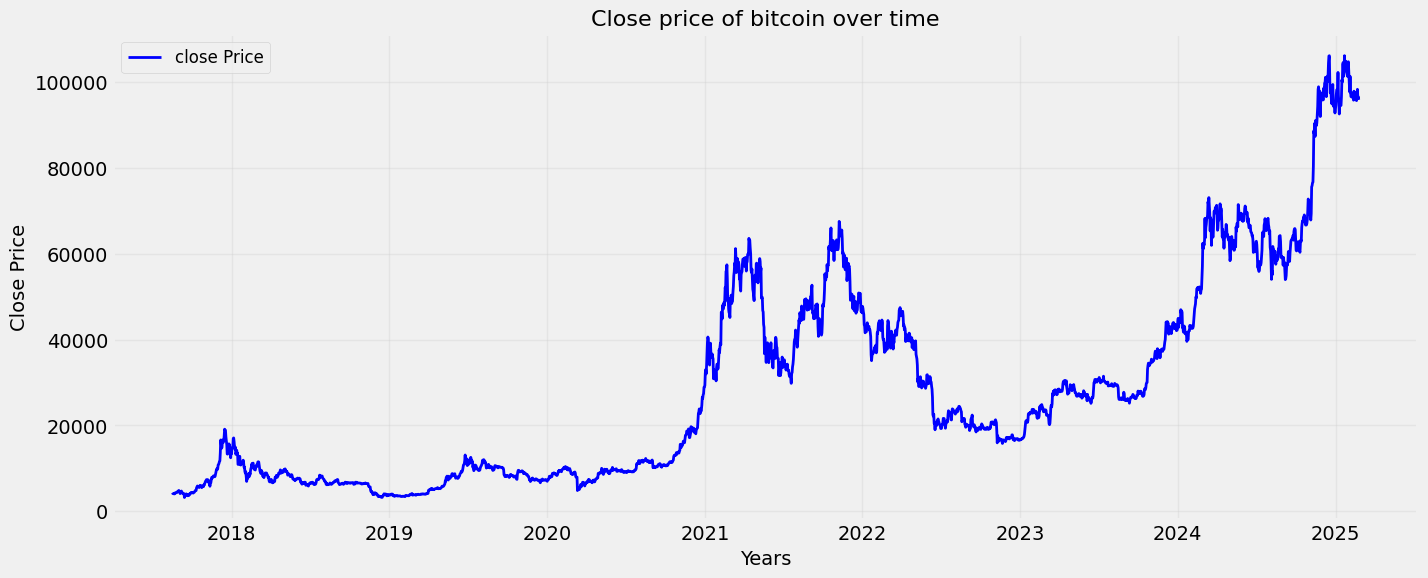

In [10]:
#Plot closing price with enchacement
plt.figure(figsize = (15, 6))
plt.plot(closing_price.index, closing_price['close'], label = 'close Price', color = 'blue', linewidth =2)
plt.title("Close price of bitcoin over time", fontsize = 16)
plt.xlabel("Years", fontsize = 14)
plt.ylabel('Close Price', fontsize = 14)
plt.grid(alpha = 0.3)
plt.legend(fontsize = 12)
plt.show()

In [11]:
# Moving Average
temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
# moving average for 5 day -> null null null null 30.0 40.0
print(sum(temp_data[1:6])/5)

40.0


In [12]:
df1 = pd.DataFrame(temp_data)

In [13]:
df1.rolling(5).mean()

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,30.0
5,40.0
6,50.0
7,60.0
8,70.0
9,80.0


In [14]:
for i in range(2014, 2024):
    print(i, list(stock_data.index.year).count(i))

2014 0
2015 0
2016 0
2017 137
2018 365
2019 365
2020 366
2021 365
2022 365
2023 365


In [15]:
closing_price['MA_365'] = closing_price['close'].rolling(window = 365).mean()
closing_price['MA_100'] = closing_price['close'].rolling(window = 100).mean()

/tmp/ipykernel_1710/3552797743.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closing_price['MA_365'] = closing_price['close'].rolling(window = 365).mean()
/tmp/ipykernel_1710/3552797743.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closing_price['MA_100'] = closing_price['close'].rolling(window = 100).mean()


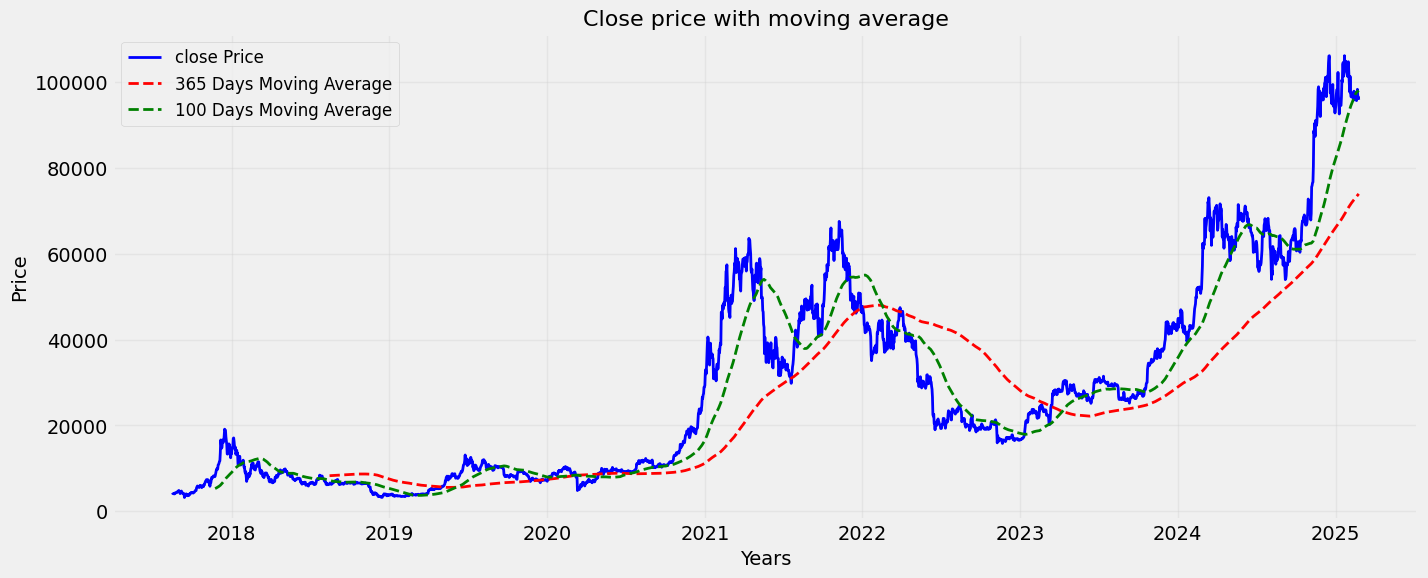

In [16]:
#Plot closing price with enchacement
plt.figure(figsize = (15, 6))
plt.plot(closing_price.index, closing_price['close'], label = 'close Price', color = 'blue', linewidth =2)
plt.plot(closing_price.index, closing_price['MA_365'], label = '365 Days Moving Average', color = 'red', linestyle ="--", linewidth =2)
plt.plot(closing_price.index, closing_price['MA_100'], label = '100 Days Moving Average', color = 'green',linestyle ="--", linewidth =2)

plt.title("Close price with moving average", fontsize = 16)
plt.xlabel("Years", fontsize = 14)
plt.ylabel('Price', fontsize = 14)
plt.grid(alpha = 0.3)
plt.legend(fontsize = 12)
plt.show()

In [18]:
# LSTM-> Long short term memory
# scale the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(closing_price[['close']].dropna())

In [19]:
len(scaled_data)

2748

In [21]:
from keras.api.models import Sequential
from keras.api.layers import Dense, LSTM

2025-02-23 13:15:35.523684: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-23 13:15:35.530619: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-23 13:15:35.547247: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1740316535.576402    1710 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1740316535.584481    1710 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-23 13:15:35.616508: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [24]:
# Prepare data for lstm
x_data = []
y_data = []
base_days =100
for i in range(base_days, len(scaled_data)):
    x_data.append(scaled_data[i-base_days: i])
    y_data.append(scaled_data[i])
x_data = np.array(x_data)
y_data = np.array(y_data)

In [25]:
# Split into train and test sets
train_size = int(len(x_data) * 0.9)
x_train , y_train = x_data[:train_size], y_data[:train_size]
x_test, y_test = x_data[train_size:], y_data[train_size:]

In [26]:
model = Sequential([
    LSTM(128, return_sequences = True, input_shape = (x_train.shape[1], 1)),
    LSTM(64, return_sequences = False),
    Dense(25),
    Dense(1)
])

model.compile(optimizer = "adam", loss = "mean_squared_error")
model.summary()

2025-02-23 13:16:32.473640: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/home/vybhavguttula/myenv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 117,619 (459.45 KB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
model.fit(x_train, y_train, batch_size = 5, epochs = 10)

Epoch 1/10
477/477 ━━━━━━━━━━━━━━━━━━━━ 47s 91ms/step - loss: 0.0026 
Epoch 2/10
477/477 ━━━━━━━━━━━━━━━━━━━━ 79s 84ms/step - loss: 4.0412e-04
Epoch 3/10
477/477 ━━━━━━━━━━━━━━━━━━━━ 41s 83ms/step - loss: 4.2306e-04
Epoch 4/10
477/477 ━━━━━━━━━━━━━━━━━━━━ 40s 83ms/step - loss: 2.6474e-04
Epoch 5/10
477/477 ━━━━━━━━━━━━━━━━━━━━ 76s 158ms/step - loss: 2.3005e-04
Epoch 6/10
477/477 ━━━━━━━━━━━━━━━━━━━━ 78s 164ms/step - loss: 2.4836e-04 
Epoch 7/10
477/477 ━━━━━━━━━━━━━━━━━━━━ 78s 163ms/step - loss: 2.1790e-04 
Epoch 8/10
477/477 ━━━━━━━━━━━━━━━━━━━━ 75s 148ms/step - loss: 1.5941e-04
Epoch 9/10
477/477 ━━━━━━━━━━━━━━━━━━━━ 78s 164ms/step - loss: 1.7204e-04 
Epoch 10/10
477/477 ━━━━━━━━━━━━━━━━━━━━ 85s 169ms/step - loss: 1.6384e-04


In [28]:
predictions = model.predict(x_test)
inv_predictions = scaler.inverse_transform(predictions)
inv_y_test = scaler.inverse_transform(y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step 


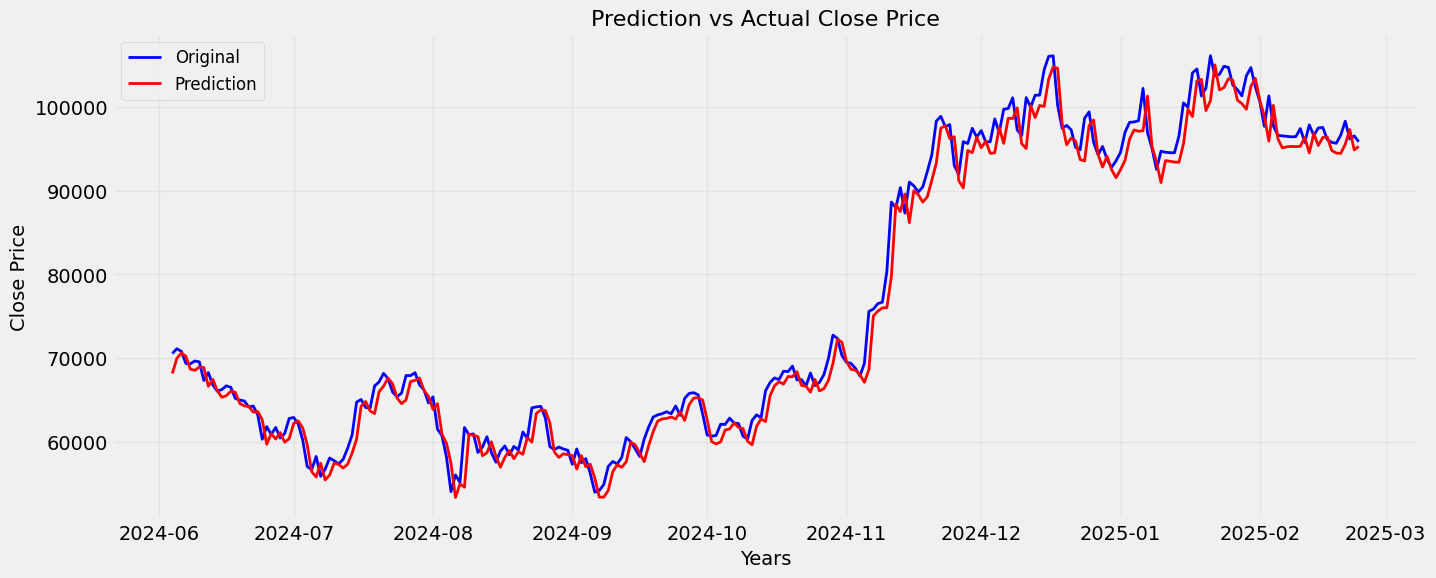

In [29]:
plotting_data = pd.DataFrame(
    {
        'Original': inv_y_test.flatten(), 
        'Prediction': inv_predictions.flatten(),
    }, index = closing_price.index[train_size + base_days:]
)

plt.figure(figsize = (15, 6))
plt.plot(plotting_data.index, plotting_data['Original'], label = 'Original', color = 'blue', linewidth =2)
plt.plot(plotting_data.index, plotting_data['Prediction'], label = 'Prediction', color = 'red',  linewidth =2)

plt.title("Prediction vs Actual Close Price", fontsize = 16)
plt.xlabel("Years", fontsize = 14)
plt.ylabel('Close Price', fontsize = 14)
plt.grid(alpha = 0.3)
plt.legend(fontsize = 12)
plt.show()

In [30]:
# Predict future days
last_100  = scaled_data[-100:].reshape(1, -1, 1)
future_predictions=[]
for _ in range(10):
    next_days = model.predict(last_100)
    future_predictions.append(scaler.inverse_transform(next_days))
    last_100 = np.append(last_100[:, 1:, :], next_days.reshape(1, 1, -1), axis = 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


In [31]:
future_predictions

[array([[94592.2]], dtype=float32),
 array([[93268.375]], dtype=float32),
 array([[91936.49]], dtype=float32),
 array([[90632.21]], dtype=float32),
 array([[89371.66]], dtype=float32),
 array([[88161.01]], dtype=float32),
 array([[87001.64]], dtype=float32),
 array([[85892.66]], dtype=float32),
 array([[84832.086]], dtype=float32),
 array([[83817.34]], dtype=float32)]

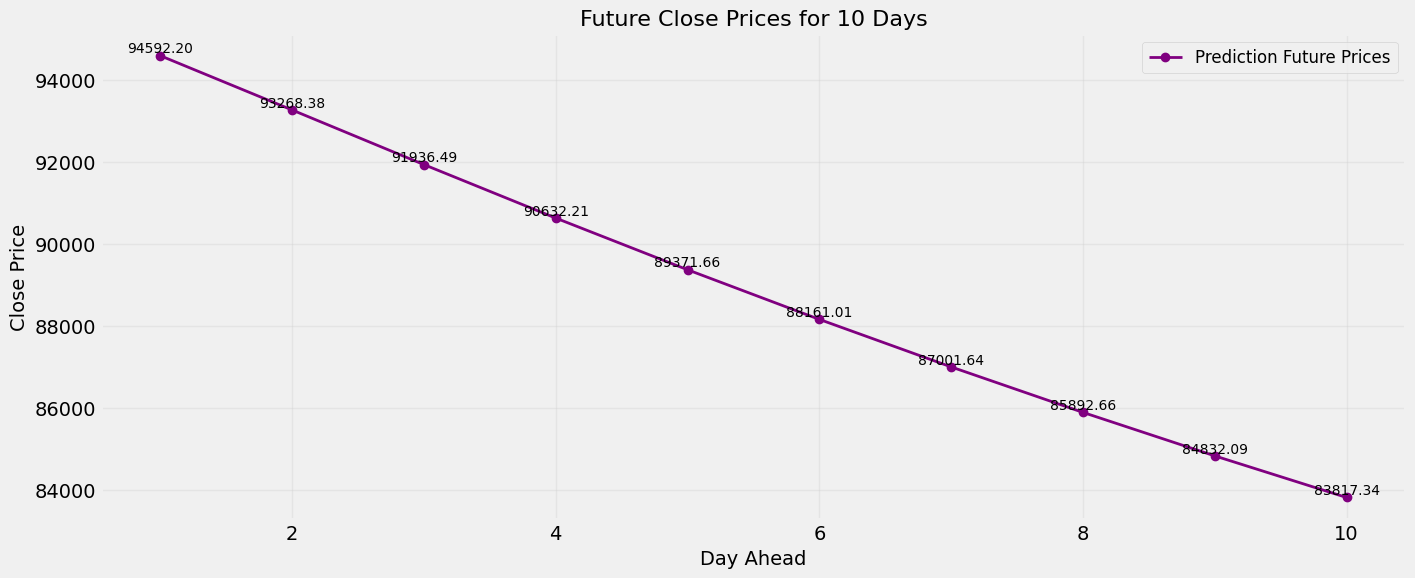

In [33]:
future_predictions = np.array(future_predictions).flatten()

plt.figure(figsize = (15, 6))
plt.plot(range(1, 11), future_predictions, marker="o" ,label = 'Prediction Future Prices', color = 'purple', linewidth =2)

for i, val in enumerate(future_predictions):
    plt.text(i+1,val,  f'{val:.2f}', fontsize = 10, ha = 'center', va = 'bottom', color='black')

plt.title("Future Close Prices for 10 Days", fontsize = 16)
plt.xlabel("Day Ahead", fontsize = 14)
plt.ylabel('Close Price', fontsize = 14)
plt.grid(alpha = 0.3)
plt.legend(fontsize = 12)
plt.show()

In [35]:
model.save("model.keras")